In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

# Load cleaned data
df = pd.read_csv(r"C:\Users\youg_\capstone-project-YougOsti\processed\cleaned_dailyclimate.csv", low_memory=False)


In [4]:

# Remove duplicated columns
df = df.loc[:, ~df.columns.duplicated()]



In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])



In [6]:
 Extract year
df['Year'] = df['Date'].dt.year

df['5_Year_Group'] = (df['Year'] // 5) * 5


In [7]:
# Group by 5-Year Interval and calculate mean
grouped_5yr = df.groupby('5_Year_Group').mean(numeric_only=True).reset_index()


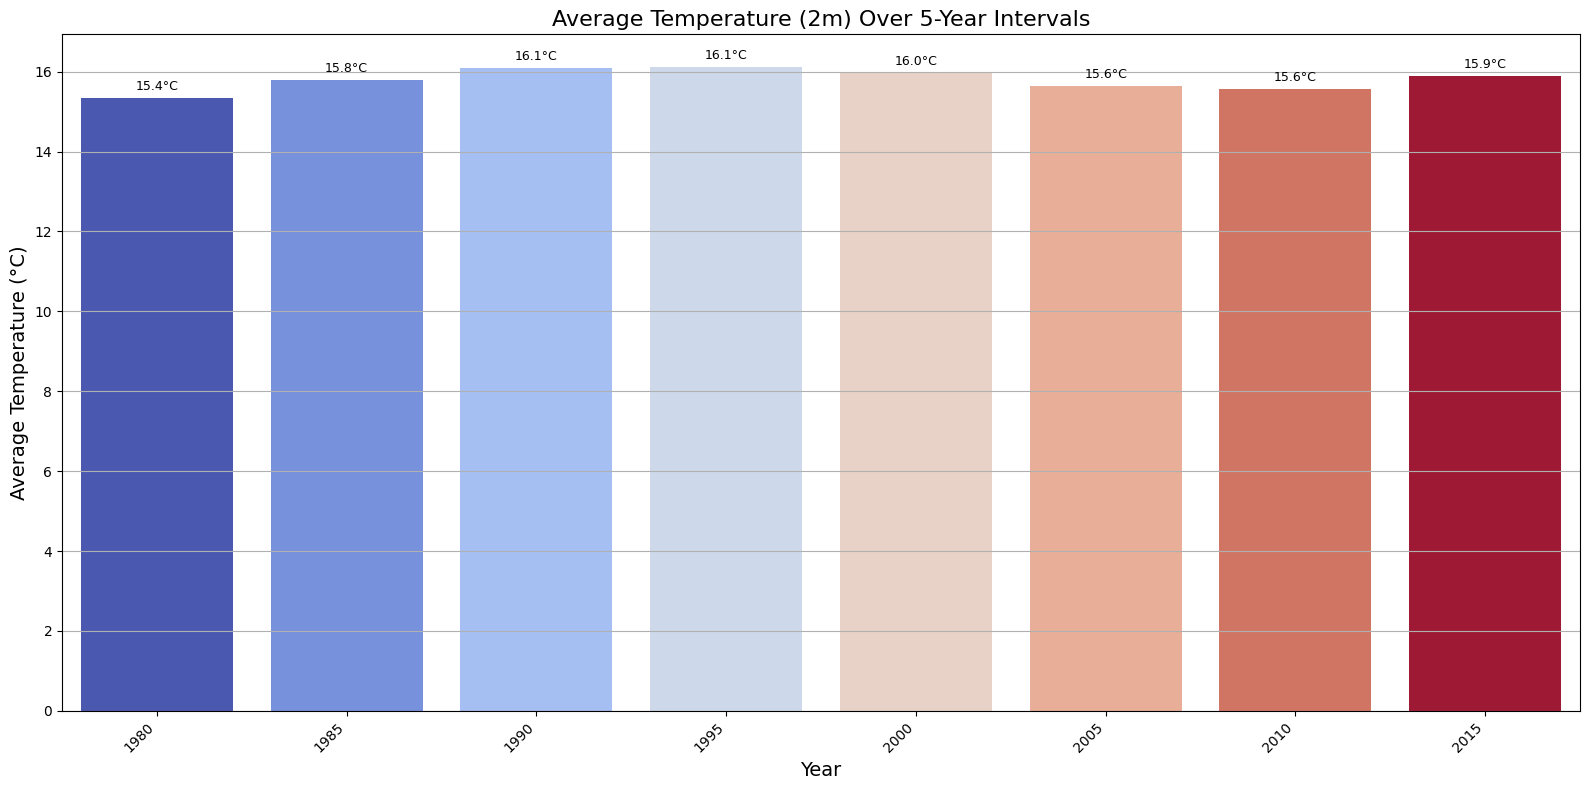

In [8]:
# Plotting
plt.figure(figsize=(16, 8))

# Plot bar plot
barplot = sns.barplot(data=grouped_5yr, x='5_Year_Group', y='Temp_2m', 
                      hue='5_Year_Group', palette='coolwarm', legend=False)

# Annotate mean temperature
for index, row in grouped_5yr.iterrows():
    barplot.text(index, row['Temp_2m'] + 0.2, 
                 f"{row['Temp_2m']:.1f}°C", 
                 color='black', ha='center', fontsize=9)

# Labels and title
plt.title('Average Temperature (2m) Over 5-Year Intervals', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [9]:
grouped_5yr.head(4)

,5_Year_Group,Unnamed: 0,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m,Year
0,1980,435172.0,27.959677,84.277419,2.396230,82.866422,8.305805,55.677387,15.350146,5.180622,...,15.016112,2.370386,4.672324,0.666682,4.005654,2.741012,4.657948,0.922829,3.735125,1982.501027
1,1985,436815.5,27.959677,84.277419,2.139655,82.879577,7.962200,52.470355,15.779874,4.366201,...,15.497670,2.415621,4.739110,0.679755,4.059343,2.772642,4.699385,0.938125,3.761278,1987.000548
2,1990,438641.5,27.959677,84.277419,1.580653,82.901378,7.717435,49.253718,16.098426,3.813804,...,16.015370,2.478527,4.923825,0.681522,4.242307,2.832520,4.854424,0.943704,3.910696,1992.000000
3,1995,440467.5,27.959677,84.277419,1.538472,82.885796,7.894646,49.967991,16.128364,3.977870,...,16.096535,2.479693,4.963845,0.673285,4.290529,2.821072,4.876416,0.928605,3.947775,1996.999452


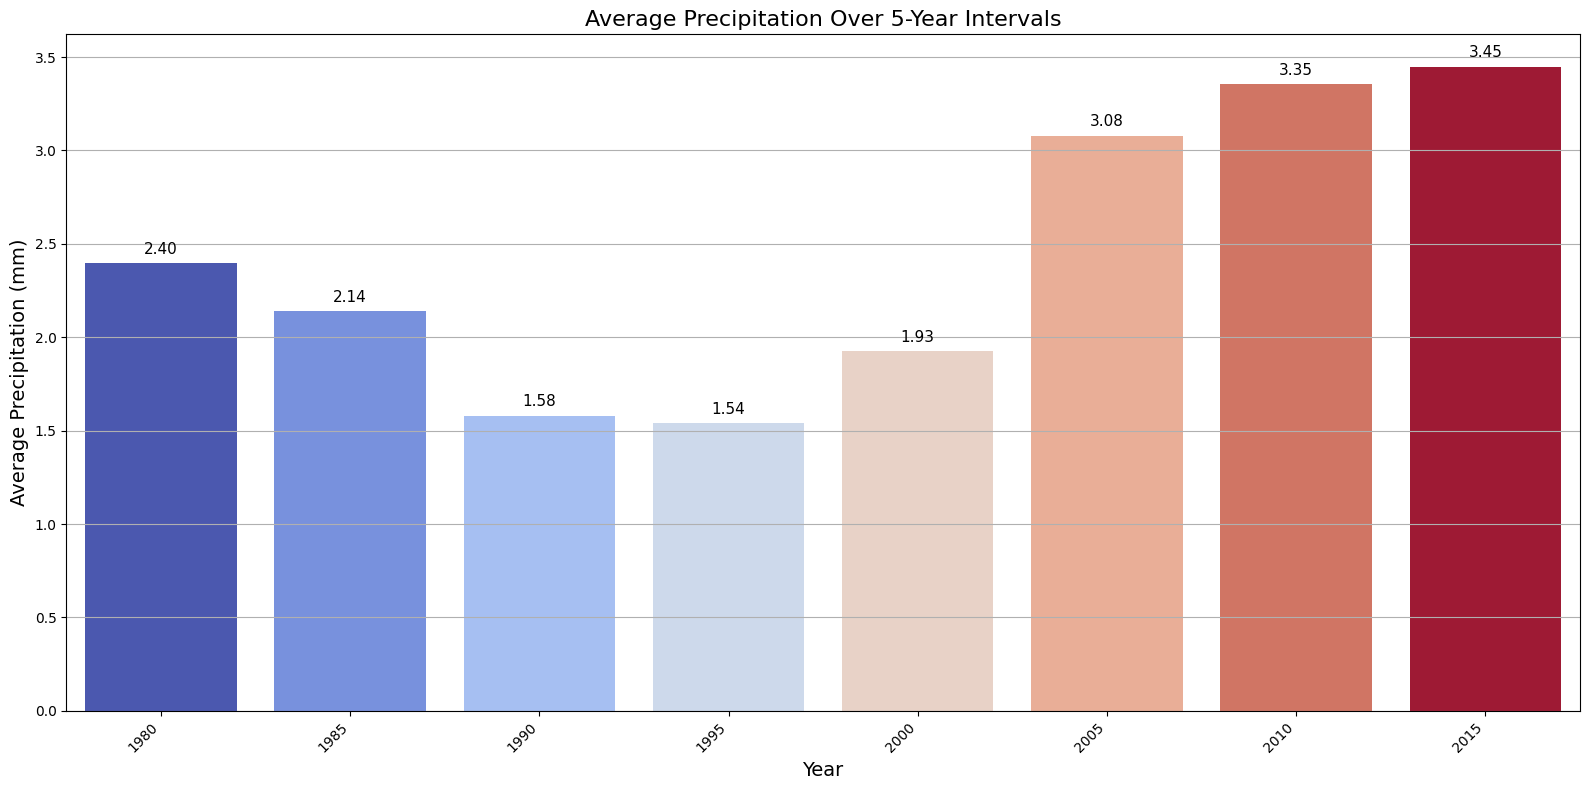

In [10]:
# 🔵 Important: Create figure BEFORE plotting
plt.figure(figsize=(16, 8))

# Plot bar plot for Precip
barplot = sns.barplot(data=grouped_5yr, x='5_Year_Group', y='Precip', 
                      hue='5_Year_Group', palette='coolwarm', legend=False)

# Annotate mean precipitation on top of each bar
for index, row in grouped_5yr.iterrows():
    barplot.text(index, row['Precip'] + 0.05,    # little above the bar
                 f"{row['Precip']:.2f}",          # keep 2 decimal points
                 color='black', ha='center', fontsize=11)

# Labels and title
plt.title('Average Precipitation Over 5-Year Intervals', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Precipitation (mm)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# VERY IMPORTANT
plt.show()


In [12]:
grouped_5yr.columns

Index(['5_Year_Group', 'Unnamed: 0', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m', 'Year'],
      dtype='object')